In [115]:
# How does bushfire affect aquatic ecosystems in lakes of NSW?

In [116]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.ticker as ticker

In [117]:
shp_file_name = r"gda2020\nsw_localities.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)

In [118]:
%matplotlib inline

In [119]:
plt.rcParams["figure.figsize"] = (10, 5)

In [120]:
saved_style_state = matplotlib.rcParams.copy()

In [121]:
if os.path.isfile("bushfire-water-quality-dataset.csv"):
    filepath = "bushfire-water-quality-dataset.csv"
    print("loading from file")
else:
    filepath = "https://data.nsw.gov.au/search/dataset/ds-nsw-ckan-9e9b4c96-1a68-4dea-a5b0-23dd4cba9839/details?q="
    print("loading from the internet")
bushfire_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [122]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests

        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, "wb") as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [123]:
bushfire_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["Date"],
    dayfirst=True,
)
bushfire_data.head(2)

C:\Users\ailee\AppData\Local\Temp\ipykernel_22992\3239797389.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bushfire_data = pd.read_csv(


,Date,Time Frame,Estuary,Zone,Dissolved oxygen (% saturation),Salinity (psu),pH,Chlorophyll-a (ug/L),"Blue green alage (BGA, ug/L)",Turbidity (NTU),fDOM (RFU),Dissolved nitrogen (ug/L),Total nitrogen (ug/L),Dissolved phosphorus (ug/L),Total phosphorus (ug/L),"Nitrogen oxides (NOx, ug/L)","Ammonia (NH3, ug/L)","Phosphate (PO4 3-, ug/L"
0,2017-10-31,Pre-fire,Lake Conjola,1,102.1,33.0,7.97,2.63,5.56,1,3.0,208.4,326.5,12.34,22.6,1.0,3.0,0.0
1,2017-10-31,Pre-fire,Lake Conjola,2,104.4,34.0,8.05,1.5,2.32,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
bushfire_data["Estuary"].unique()

array(['Lake Conjola', 'Durras Lake', 'Khappinghat Creek', 'Meroo Lake',
       'Termeil Lake', 'Tilba Tilba Lake', 'Smiths Lake', 'Wapengo Lake',
       'Wallaga Lake', 'Wonboyn Lake'], dtype=object)

In [125]:
bushfire_data["Time Frame"].unique()

array(['Pre-fire', 'Post-fire', 'During fire'], dtype=object)

In [126]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(bushfire_data.Date.min(), date_format_pattern)
latest_date = datetime.strftime(bushfire_data.Date.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: November, 2013 to April, 2023'

In [127]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True)
burbs.sample(2)

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry
4467,lcpT6wNicUGqRfw,loc529acfb91112,2023-08-24,Woodburn,Gazetted Locality,NSW,"POLYGON ((150.377 -35.356, 150.381 -35.356, 15..."
2572,lcp1e237b3f6f26,loc92dd4ad0dc9a,2021-06-24,Marthaguy,Gazetted Locality,NSW,"POLYGON ((147.815 -30.991, 147.815 -30.992, 14..."


In [128]:
bf_read = gp.read_file("bushfire-water-quality-dataset.csv")
bf_read.head()

,Date,Time Frame,Estuary,Zone,Dissolved oxygen (% saturation),Salinity (psu),pH,Chlorophyll-a (ug/L),"Blue green alage (BGA, ug/L)",Turbidity (NTU),fDOM (RFU),Dissolved nitrogen (ug/L),Total nitrogen (ug/L),Dissolved phosphorus (ug/L),Total phosphorus (ug/L),"Nitrogen oxides (NOx, ug/L)","Ammonia (NH3, ug/L)","Phosphate (PO4 3-, ug/L",geometry
0,31/10/2017,Pre-fire,Lake Conjola,1,102.1,33,7.97,2.63,5.56,1,3,208.4,326.5,12.34,22.6,1,3,0,None
1,31/10/2017,Pre-fire,Lake Conjola,2,104.4,34,8.05,1.5,2.32,0,2,,,,,,,,None
2,23/11/2017,Pre-fire,Lake Conjola,1,96.9,33,7.92,2.5,6.15,1,3,,,,,,,,None
3,23/11/2017,Pre-fire,Lake Conjola,2,98.1,34,8,1.06,2.39,1,2,,,,,,,,None
4,19/12/2017,Pre-fire,Lake Conjola,1,100.3,34,7.8,2.61,3.56,1,4,225.7,287.7,-1.97426,6.388,0.03515,0.2326,0.6248,None


In [129]:
addreses = [f"{x}, Australia" for x in bf_read.Estuary.unique()]
estuary_loc_df = gp.tools.geocode(addreses)
estuary_loc_df["Estuary"] = bf_read.Estuary.unique()
estuary_loc_df

,geometry,address,Estuary
0,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia",Lake Conjola
1,POINT (150.30111 -35.64833),"Durras Lake, New South Wales, Australia",Durras Lake
2,POINT (152.46843 -32.01202),"Khappinghat Creek, 2430, Australia",Khappinghat Creek
3,POINT (150.38514 -35.48396),"Meroo Lake, 2539, Australia",Meroo Lake
4,POINT (150.38755 -35.46131),"Termeil Lake, 2539, Australia",Termeil Lake
5,POINT (150.11384 -36.31759),"Lake Tilba Tilba, 2546, Australia",Tilba Tilba Lake
6,POINT (152.48614 -32.38441),"Smiths Lake, 2428, Australia",Smiths Lake
7,POINT (150.01689 -36.60990),"Wapengo Lake, Australia",Wapengo Lake
8,POINT (150.06710 -36.37050),"Wallaga Lake, 2546, Bega Valley Shire Council,...",Wallaga Lake
9,POINT (149.93029 -37.23272),"Wonboyn Lake, Australia",Wonboyn Lake


In [130]:
lake_df = bf_read.merge(estuary_loc_df, on="Estuary", how="inner")
lake_df.head()

,Date,Time Frame,Estuary,Zone,Dissolved oxygen (% saturation),Salinity (psu),pH,Chlorophyll-a (ug/L),"Blue green alage (BGA, ug/L)",Turbidity (NTU),...,Dissolved nitrogen (ug/L),Total nitrogen (ug/L),Dissolved phosphorus (ug/L),Total phosphorus (ug/L),"Nitrogen oxides (NOx, ug/L)","Ammonia (NH3, ug/L)","Phosphate (PO4 3-, ug/L",geometry_x,geometry_y,address
0,31/10/2017,Pre-fire,Lake Conjola,1,102.1,33,7.97,2.63,5.56,1,...,208.4,326.5,12.34,22.6,1,3,0,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"
1,31/10/2017,Pre-fire,Lake Conjola,2,104.4,34,8.05,1.5,2.32,0,...,,,,,,,,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"
2,23/11/2017,Pre-fire,Lake Conjola,1,96.9,33,7.92,2.5,6.15,1,...,,,,,,,,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"
3,23/11/2017,Pre-fire,Lake Conjola,2,98.1,34,8,1.06,2.39,1,...,,,,,,,,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"
4,19/12/2017,Pre-fire,Lake Conjola,1,100.3,34,7.8,2.61,3.56,1,...,225.7,287.7,-1.97426,6.388,0.03515,0.2326,0.6248,None,POINT (150.48912 -35.26980),"Lake Conjola, 2539, New South Wales, Australia"


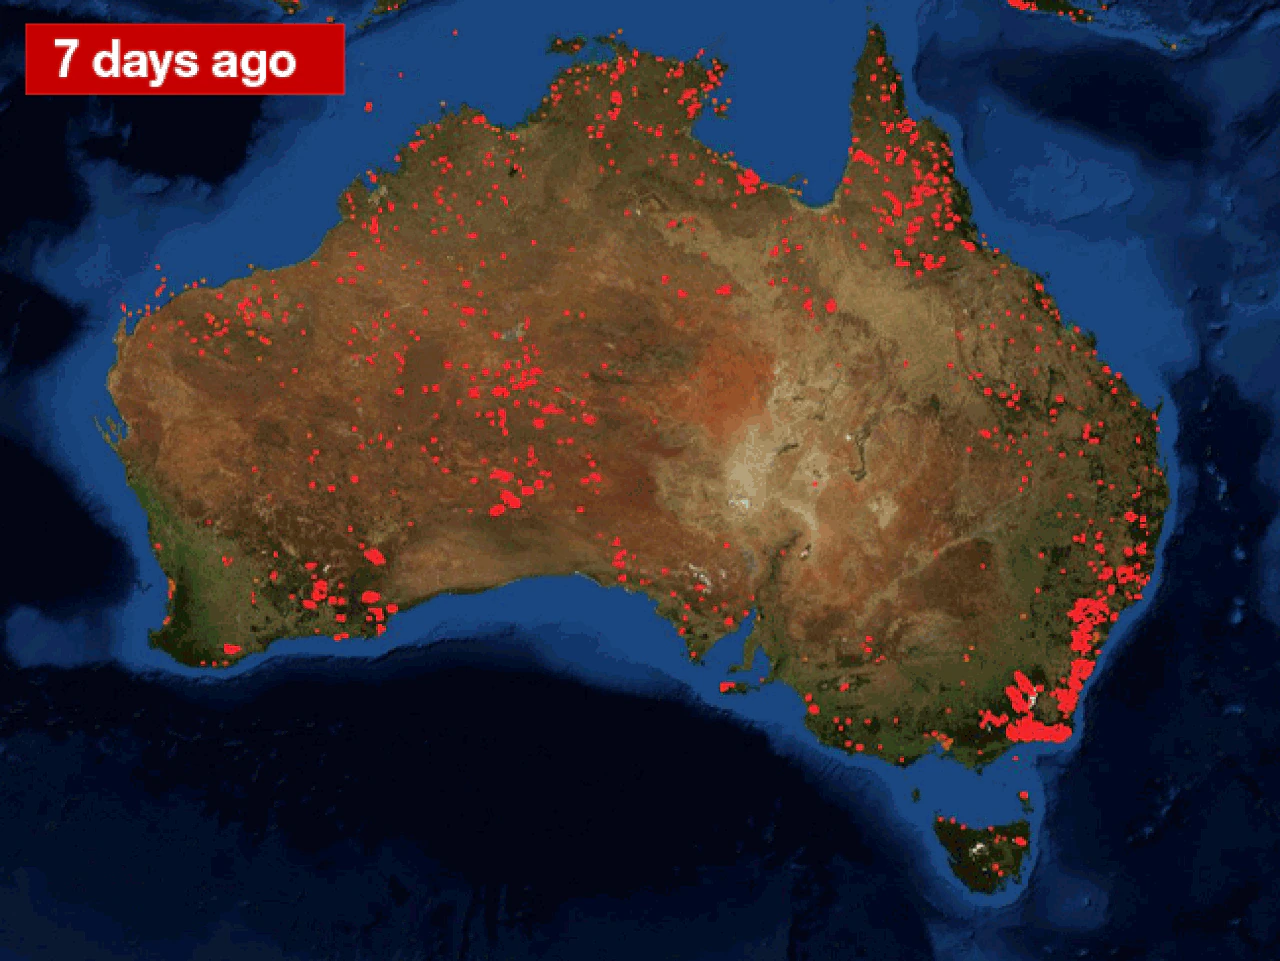

Figure 1: Australia bushfire affected area, 06-01-2019


In [131]:
from IPython.display import Image

with open("australia bushfire.webp", "rb") as file:
    display(Image(file.read()))
    print("Figure 1: Australia bushfire affected area, 06-01-2019")

<Axes: >

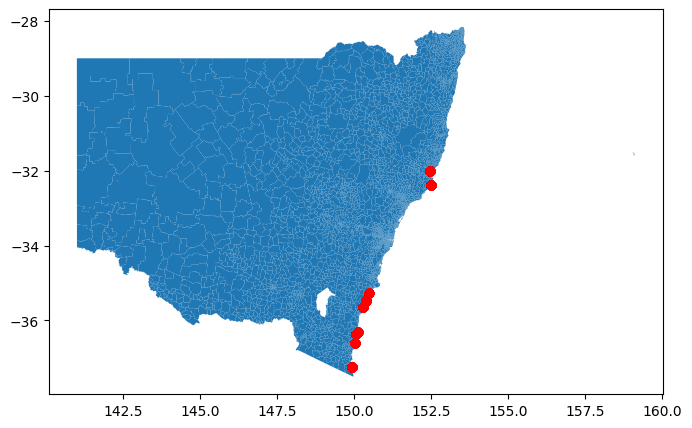

In [132]:
ax = burbs.plot()
gp.GeoDataFrame(lake_df).geometry_y.plot(ax=ax, c="r")

<Axes: >

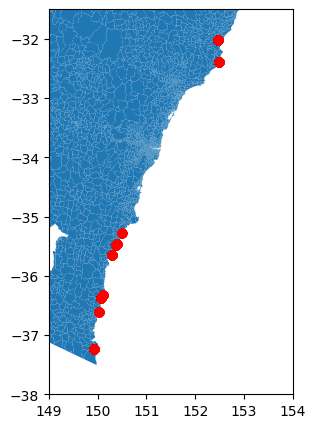

In [133]:
ax = burbs.plot()
ax.set_xlim(left=149, right=154)
ax.set_ylim(top=-31.5, bottom=-38)
gp.GeoDataFrame(lake_df).geometry_y.plot(ax=ax, c="r")

In [134]:
def plot_estuary_data(df, estuary_name, column_name):
    estuary_df = df[df["Estuary"] == estuary_name].dropna(subset=[column_name])
    plt.plot(
        estuary_df["Date"],
        estuary_df[column_name],
        label=f"{column_name} in {estuary_name}",
    )

In [135]:
bushfire_data = bushfire_data.sort_values(by="Date")

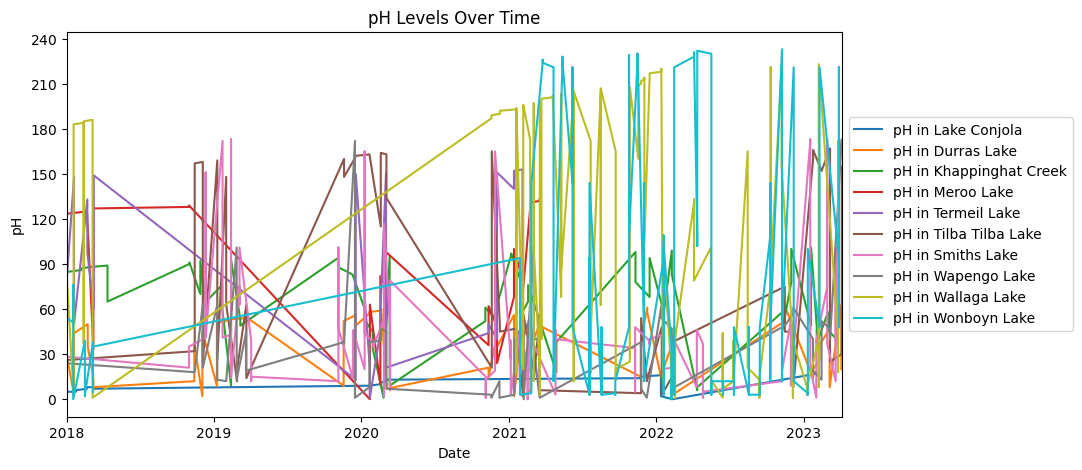

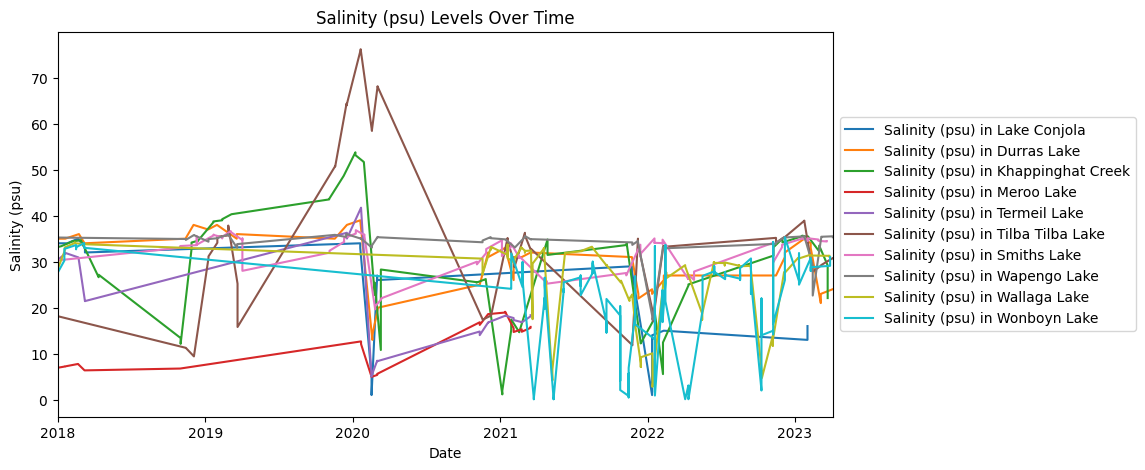

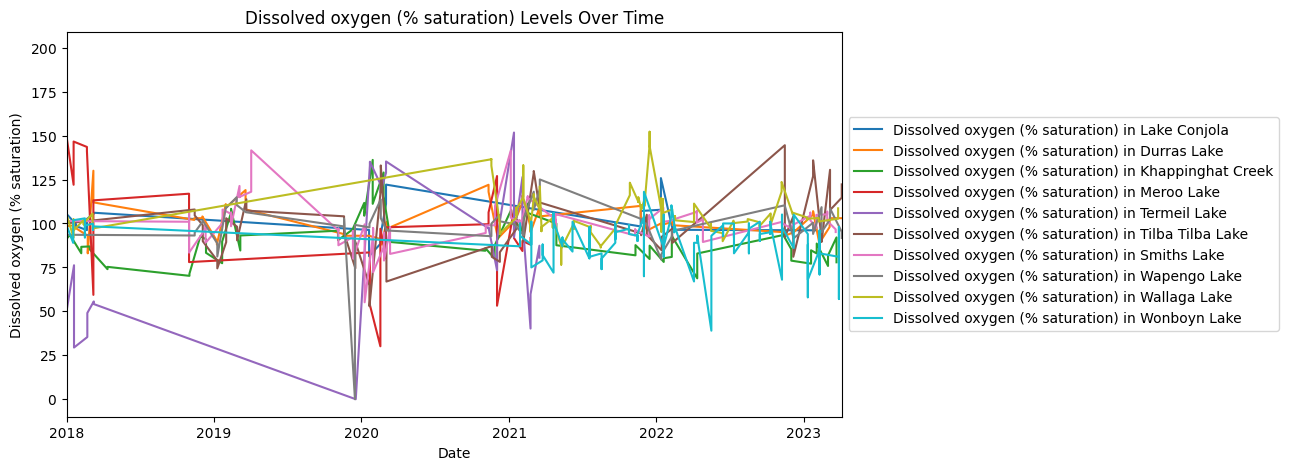

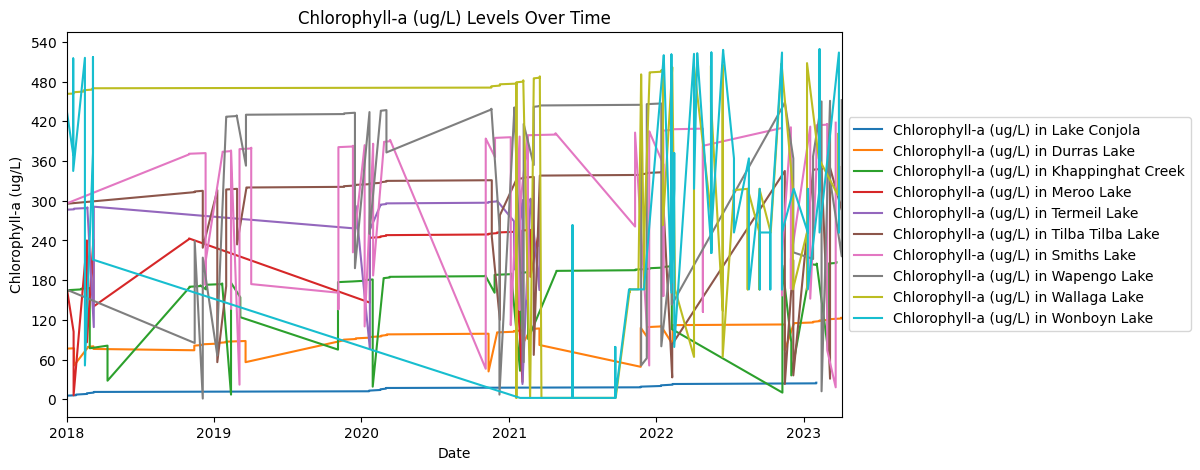

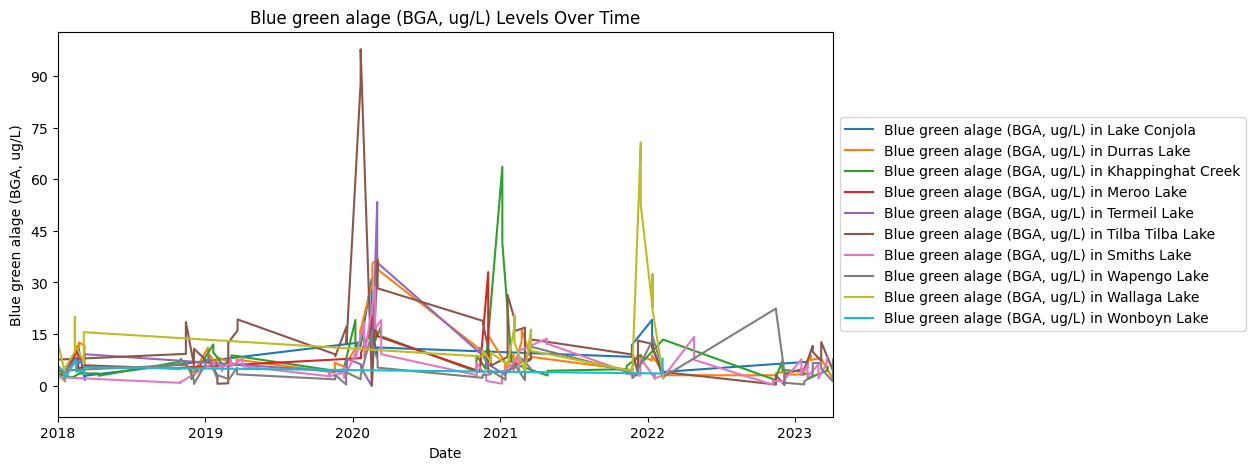

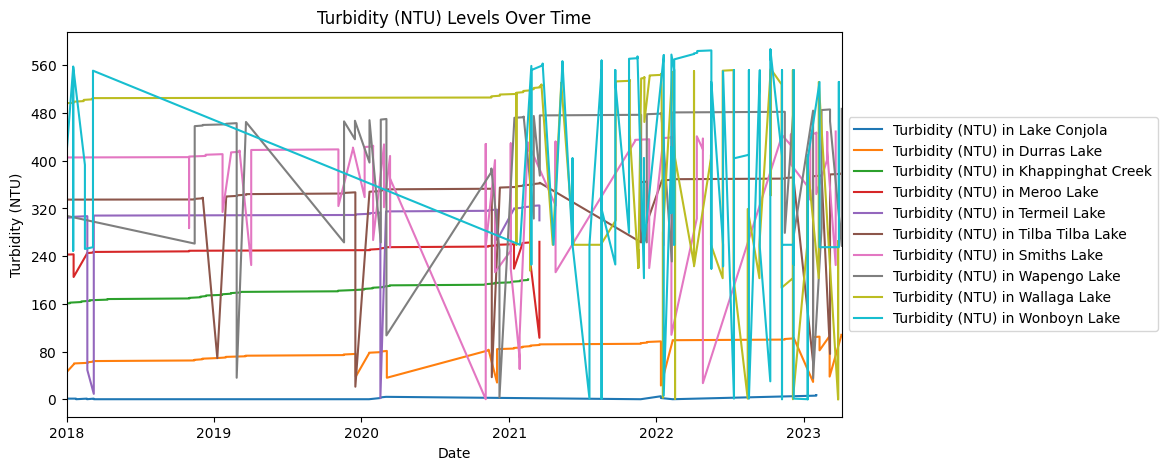

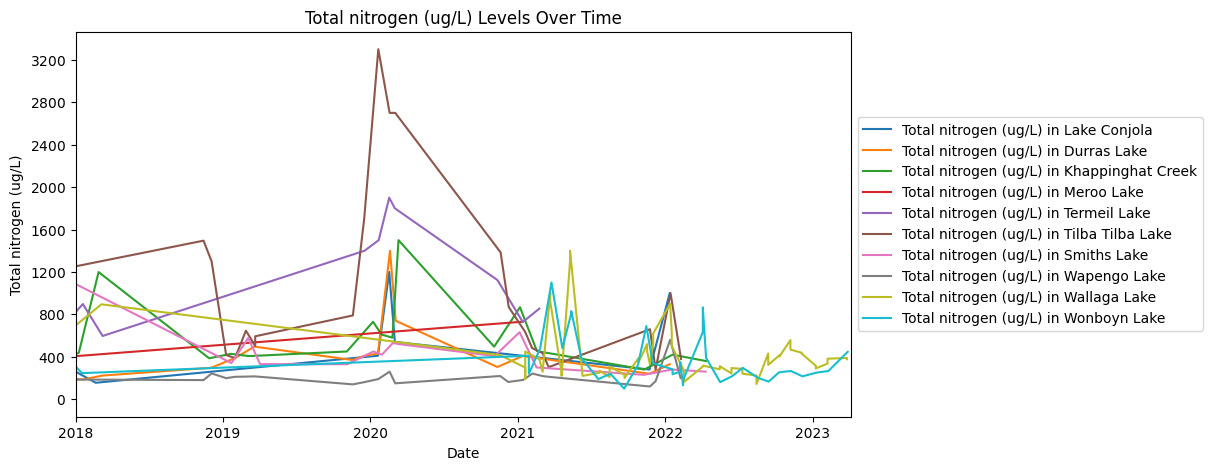

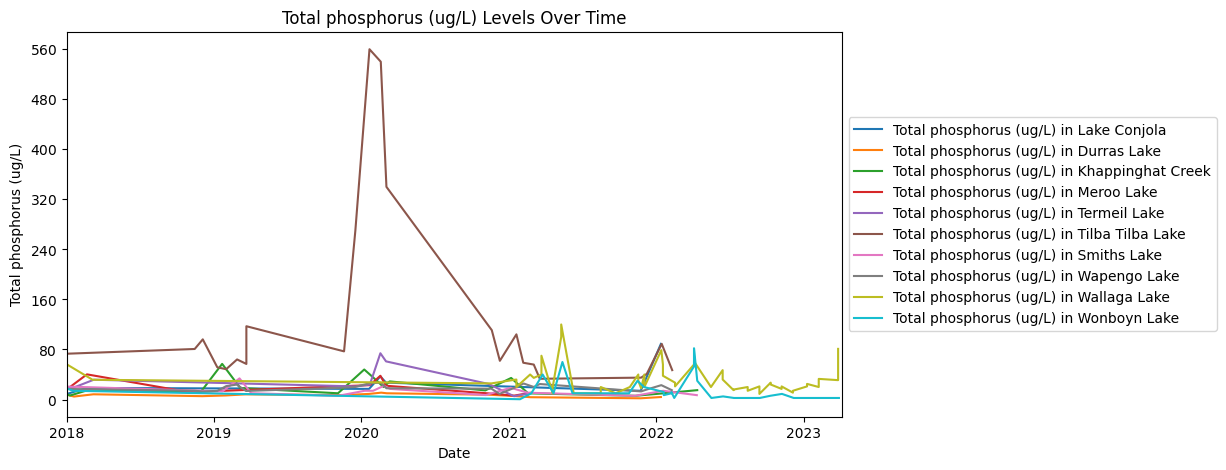

In [136]:
columns_to_plot = [
    "pH",
    "Salinity (psu)",
    "Dissolved oxygen (% saturation)",
    "Chlorophyll-a (ug/L)",
    "Blue green alage (BGA, ug/L)",
    "Turbidity (NTU)",
    "Total nitrogen (ug/L)",
    "Total phosphorus (ug/L)",
]

estuaries = [
    "Lake Conjola",
    "Durras Lake",
    "Khappinghat Creek",
    "Meroo Lake",
    "Termeil Lake",
    "Tilba Tilba Lake",
    "Smiths Lake",
    "Wapengo Lake",
    "Wallaga Lake",
    "Wonboyn Lake",
]

for column in columns_to_plot:
    plt.figure()
    for estuary in estuaries:
        plot_estuary_data(bushfire_data, estuary, column)

    plt.title(f"{column} Levels Over Time")
    plt.xlabel("Date")
    plt.xlim(pd.Timestamp("2018"), bushfire_data["Date"].max())
    plt.ylabel(column)

    plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.gca().tick_params(axis="y", which="major", labelsize=10)

    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()

In [137]:
bushfire_data["Time Frame"].unique()

array(['Pre-fire', 'During fire', 'Post-fire'], dtype=object)

In [138]:
bushfire_data['Time Frame'] = bushfire_data['Time Frame'].astype(str)

num_cols = bushfire_data.columns.difference(['Time Frame', 'Estuary'])

bushfire_data[num_cols] = bushfire_data[num_cols].apply(pd.to_numeric, errors='coerce')

average_pre_fire = (
    bushfire_data[bushfire_data["Time Frame"] == "Pre-fire"].groupby("Estuary")[num_cols].mean()
)
average_post_fire = (
    bushfire_data[bushfire_data["Time Frame"] == "Post-fire"].groupby("Estuary")[num_cols].mean()
)

average_post_fire


,"Ammonia (NH3, ug/L)","Blue green alage (BGA, ug/L)",Chlorophyll-a (ug/L),Date,Dissolved nitrogen (ug/L),Dissolved oxygen (% saturation),Dissolved phosphorus (ug/L),"Nitrogen oxides (NOx, ug/L)","Phosphate (PO4 3-, ug/L",Salinity (psu),Total nitrogen (ug/L),Total phosphorus (ug/L),Turbidity (NTU),Zone,fDOM (RFU),pH
Estuary,,,,,,,,,,,,,,,,
Durras Lake,68.428571,9.942222,5.167500,1.635610e+18,NaN,100.444444,810.985714,28.400000,25.728571,27.277778,543.942857,6.300000,4.028611,1.500000,14.658889,7.960556
Khappinghat Creek,37.800000,9.905789,4.843500,1.630841e+18,502.820000,92.194048,7.850000,115.800000,1.780000,26.704524,629.630000,22.300000,4.425559,1.500000,14.657368,7.763095
Lake Conjola,88.600000,11.636948,6.547340,1.620531e+18,524.000000,101.250000,9.800000,112.400000,4.300000,18.357143,686.000000,36.800000,6.642857,1.500000,15.000000,7.746771
Meroo Lake,651.600000,10.011875,5.341875,1.603714e+18,1421.120000,88.900059,6.200000,23.140000,1.500000,13.815000,731.000000,17.340000,1.784375,1.500000,30.318125,7.563125
Smiths Lake,3.860000,6.966818,3.531970,1.629282e+18,276.970000,99.045072,3.870000,0.950000,0.900000,31.210145,402.830000,13.090000,1.943333,1.492754,7.544545,8.021884
Termeil Lake,45.760000,10.217500,8.389375,1.603714e+18,883.860000,100.256250,9.380000,86.100000,1.300000,14.457500,1281.340000,35.100000,1.425000,1.500000,24.913750,8.098125
Tilba Tilba Lake,5.060000,9.282187,5.615625,1.642437e+18,457.510000,102.702813,25.670000,1.944444,7.530000,28.917188,642.720000,63.690000,7.301563,1.500000,13.278125,8.101250
Wallaga Lake,12.432421,15.042767,4.926542,1.638655e+18,336.446408,106.100054,14.311396,53.284965,9.177561,25.139237,407.759322,30.305327,2.547321,2.000000,12.135456,8.128614
Wapengo Lake,9.780000,5.946250,4.115625,1.642394e+18,171.030000,100.555000,7.200000,1.944444,2.670000,33.025312,228.530000,18.270000,3.534375,1.500000,4.681875,7.987813


In [139]:
bushfire_data["Time Frame"].unique()

array(['Pre-fire', 'During fire', 'Post-fire'], dtype=object)